In [49]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
df=pd.read_csv("onlinefraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df["isFraud"].value_counts()

isFraud
0    99081
1      114
Name: count, dtype: int64

In [51]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.shape

(99195, 11)

In [52]:
df.type.value_counts()

type
PAYMENT     39204
CASH_OUT    30395
CASH_IN     20104
TRANSFER     8507
DEBIT         985
Name: count, dtype: int64

In [7]:
type=df['type'].value_counts()

In [8]:
transactions=type.index

In [9]:
transactions

Index(['PAYMENT', 'CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object', name='type')

In [10]:
quantity=type.values

In [11]:
quantity

array([39204, 30395, 20104,  8507,   985])

C:\Users\aparna\AppData\Local\Temp\ipykernel_11864\2725343274.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




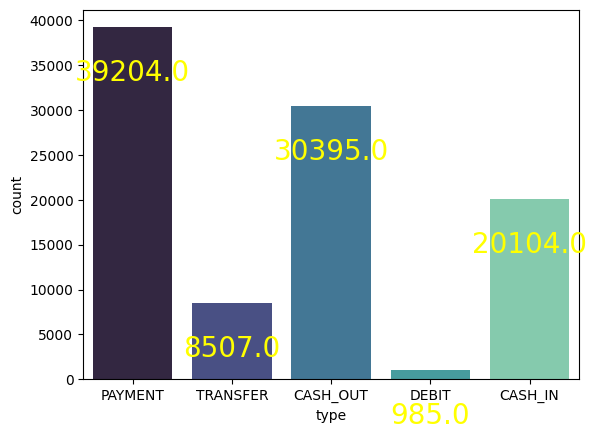

In [53]:
ax = sns.countplot(x='type',data=df, palette="mako")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='yellow', size=20)
plt.show()

In [13]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import plotly.express as px
px.pie(df,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")

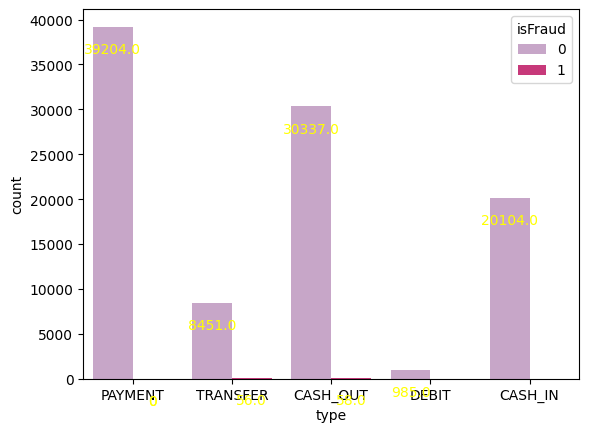

In [15]:
ax = sns.countplot(x='type',hue='isFraud',data=df, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='yellow', size=10)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode categorical columns
df['type'] = le.fit_transform(df['type'])
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])


In [18]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.103309,0.075564,-0.000416,-0.002423,-0.002452,-0.096112,0.009424,0.011124,-0.052182,NaN
type,-0.103309,1.000000,0.103020,-0.001694,-0.378182,-0.392306,0.584350,-0.149040,-0.108273,0.015495,NaN
amount,0.075564,0.103020,1.000000,0.000567,-0.010934,-0.017294,-0.325854,0.246512,0.373377,0.036473,NaN
nameOrig,-0.000416,-0.001694,0.000567,1.000000,-0.002428,-0.002490,-0.000484,0.005254,0.004551,-0.002700,NaN
oldbalanceOrg,-0.002423,-0.378182,-0.010934,-0.002428,1.000000,0.998850,-0.183961,0.106763,0.075315,-0.004159,NaN
newbalanceOrig,-0.002452,-0.392306,-0.017294,-0.002490,0.998850,1.000000,-0.187224,0.108369,0.074260,-0.010836,NaN
nameDest,-0.096112,0.584350,-0.325854,-0.000484,-0.183961,-0.187224,1.000000,-0.251946,-0.290626,-0.021897,NaN
oldbalanceDest,0.009424,-0.149040,0.246512,0.005254,0.106763,0.108369,-0.251946,1.000000,0.938546,-0.009167,NaN
newbalanceDest,0.011124,-0.108273,0.373377,0.004551,0.075315,0.074260,-0.290626,0.938546,1.000000,-0.006267,NaN
isFraud,-0.052182,0.015495,0.036473,-0.002700,-0.004159,-0.010836,-0.021897,-0.009167,-0.006267,1.000000,NaN


<Axes: >

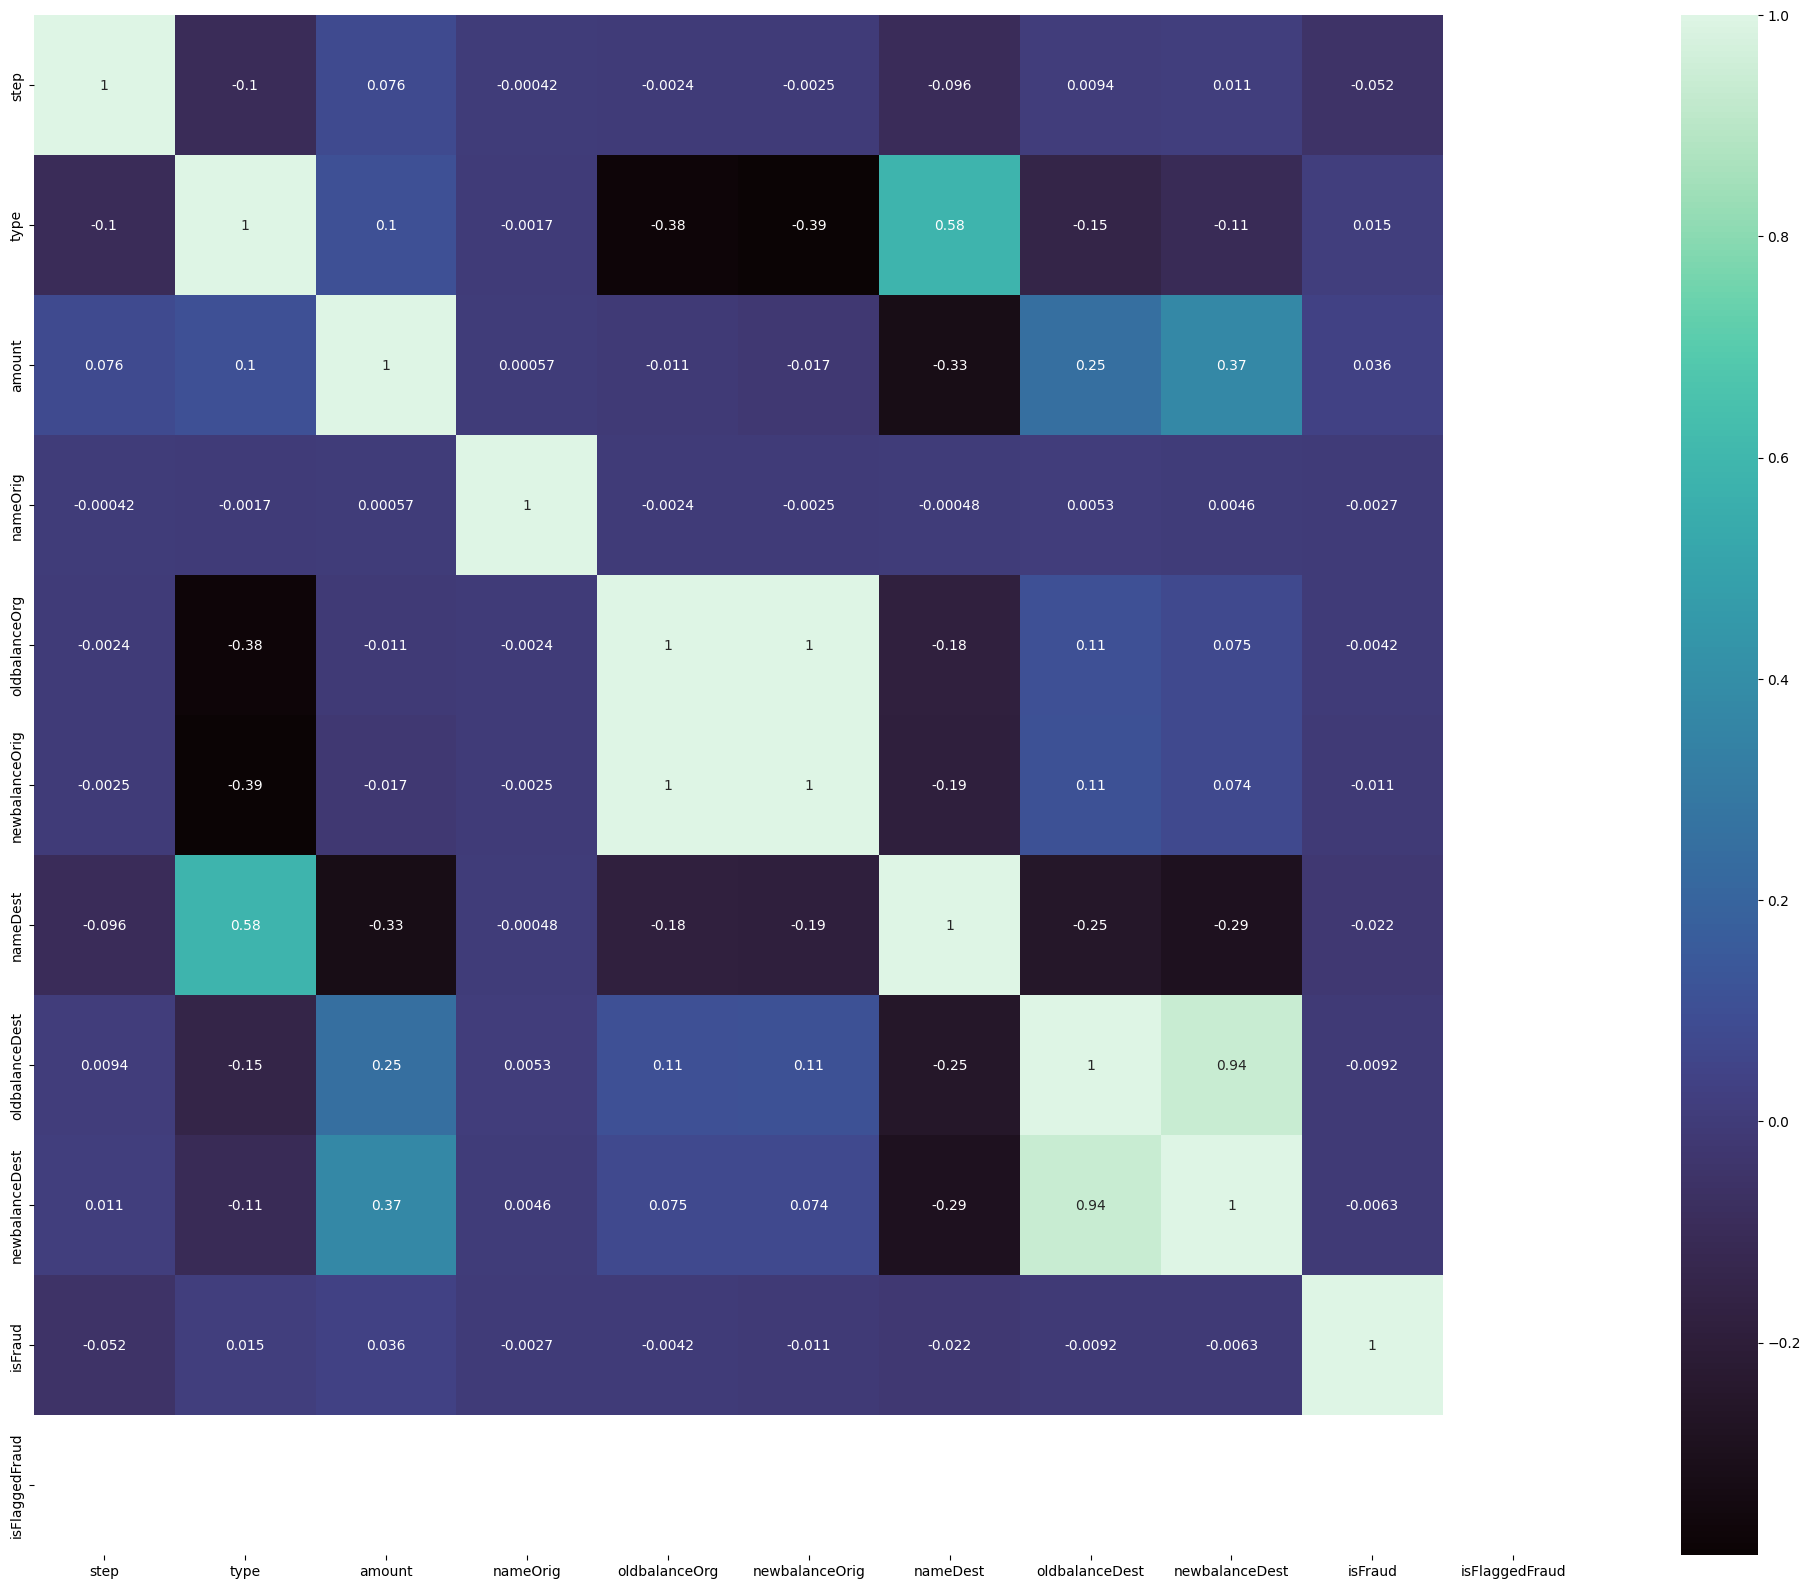

In [19]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="mako")

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'nameOrig'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'nameDest'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

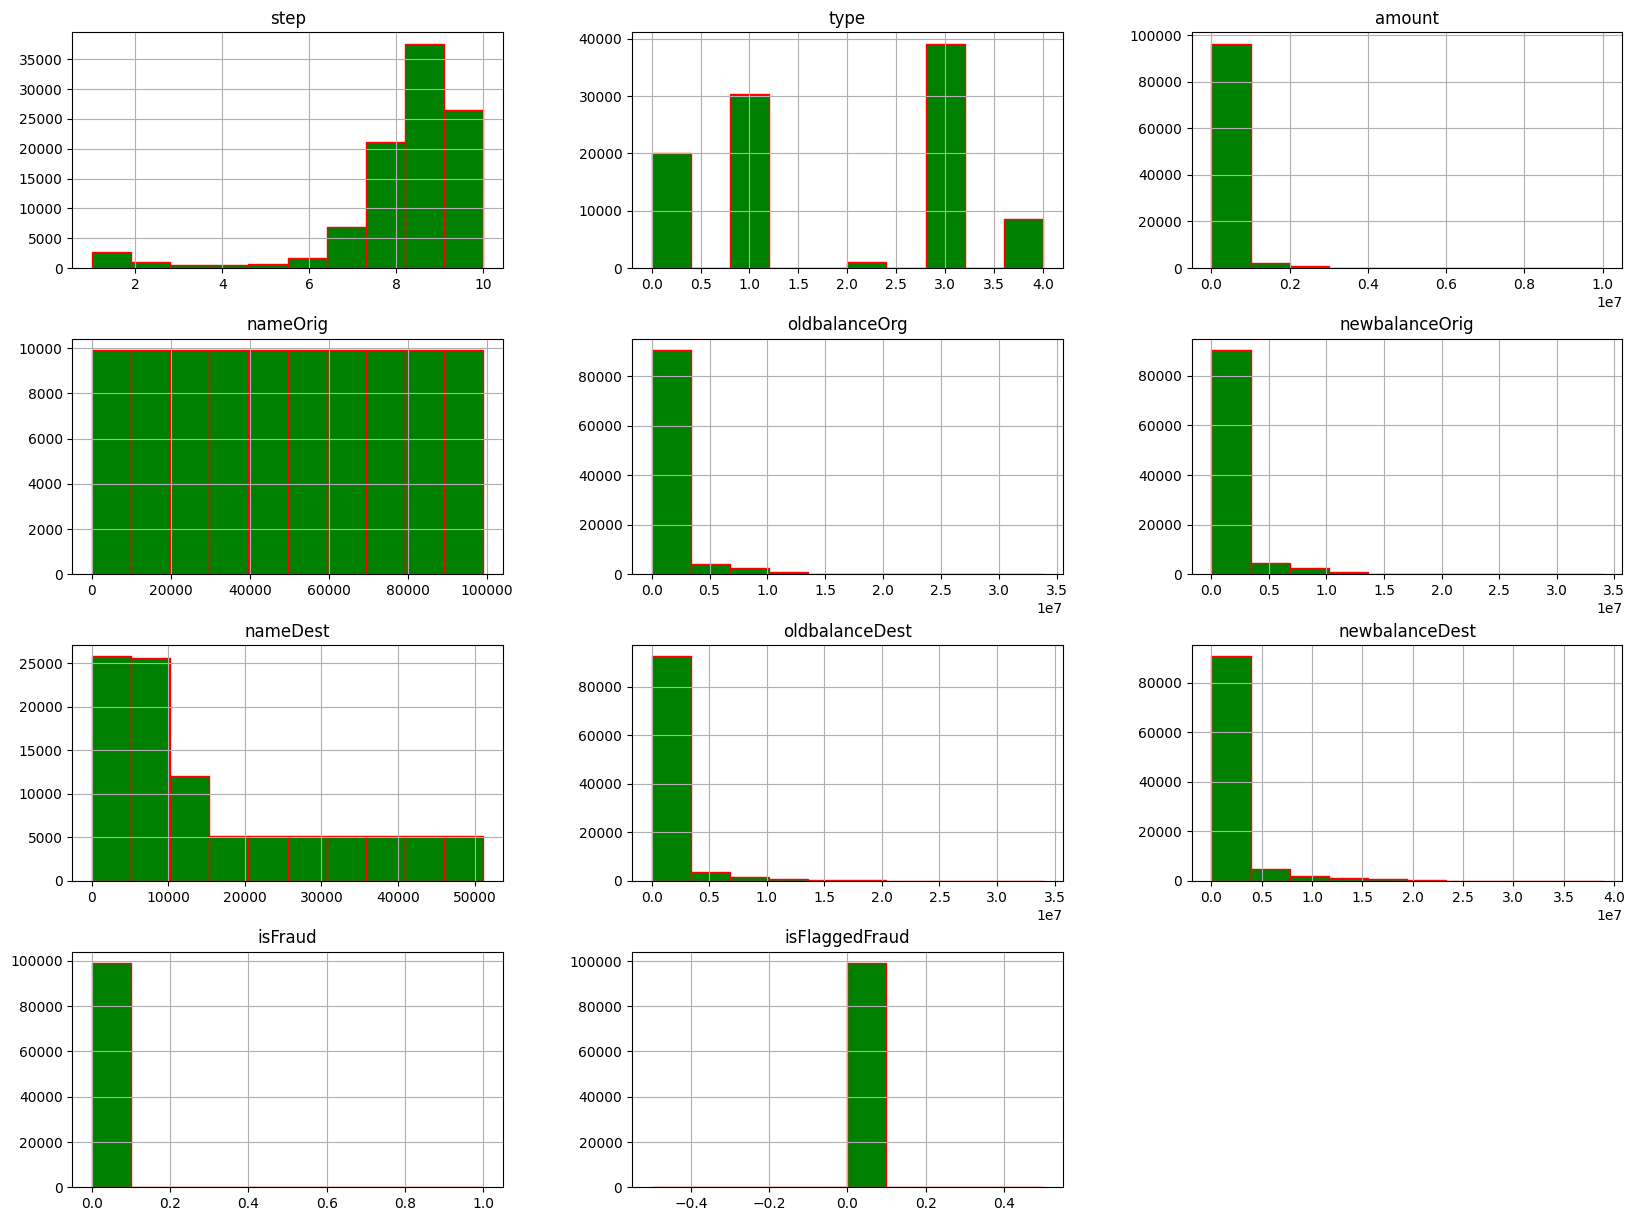

In [20]:
df.hist(figsize=(20,15),color="green",ec="red") #histograms for all

In [21]:
df=df.dropna()

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,11775,170136.0,160296.36,31735,0.00,0.00,0,0
1,1,3,1864.28,34075,21249.0,19384.72,33037,0.00,0.00,0,0
2,1,4,181.00,15522,181.0,0.00,9229,0.00,0.00,1,0
3,1,1,181.00,91028,181.0,0.00,8207,21182.00,0.00,1,0
4,1,3,11668.14,53611,41554.0,29885.86,16551,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99190,10,3,18320.16,81282,16196.0,0.00,47954,0.00,0.00,0,0
99191,10,3,13079.07,72485,2153.0,0.00,27027,0.00,0.00,0,0
99192,10,1,354739.54,29091,0.0,0.00,2847,12700000.00,13000000.00,0,0
99193,10,0,227018.07,1327,17699.0,244717.07,10164,37687.67,0.00,0,0


In [23]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,11775,170136.0,160296.36,31735,0.00,0.00,No Fraud,0
1,1,3,1864.28,34075,21249.0,19384.72,33037,0.00,0.00,No Fraud,0
2,1,4,181.00,15522,181.0,0.00,9229,0.00,0.00,Fraud,0
3,1,1,181.00,91028,181.0,0.00,8207,21182.00,0.00,Fraud,0
4,1,3,11668.14,53611,41554.0,29885.86,16551,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
99190,10,3,18320.16,81282,16196.0,0.00,47954,0.00,0.00,No Fraud,0
99191,10,3,13079.07,72485,2153.0,0.00,27027,0.00,0.00,No Fraud,0
99192,10,1,354739.54,29091,0.0,0.00,2847,12700000.00,13000000.00,No Fraud,0
99193,10,0,227018.07,1327,17699.0,244717.07,10164,37687.67,0.00,No Fraud,0


In [25]:
df['type'].unique()

array([3, 4, 1, 2, 0])

In [26]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,3,5],inplace=True)

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,11775,170136.0,160296.36,31735,0.00,0.00,No Fraud,0
1,1,3,1864.28,34075,21249.0,19384.72,33037,0.00,0.00,No Fraud,0
2,1,4,181.00,15522,181.0,0.00,9229,0.00,0.00,Fraud,0
3,1,1,181.00,91028,181.0,0.00,8207,21182.00,0.00,Fraud,0
4,1,3,11668.14,53611,41554.0,29885.86,16551,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
99190,10,3,18320.16,81282,16196.0,0.00,47954,0.00,0.00,No Fraud,0
99191,10,3,13079.07,72485,2153.0,0.00,27027,0.00,0.00,No Fraud,0
99192,10,1,354739.54,29091,0.0,0.00,2847,12700000.00,13000000.00,No Fraud,0
99193,10,0,227018.07,1327,17699.0,244717.07,10164,37687.67,0.00,No Fraud,0


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'nameOrig'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'nameDest'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

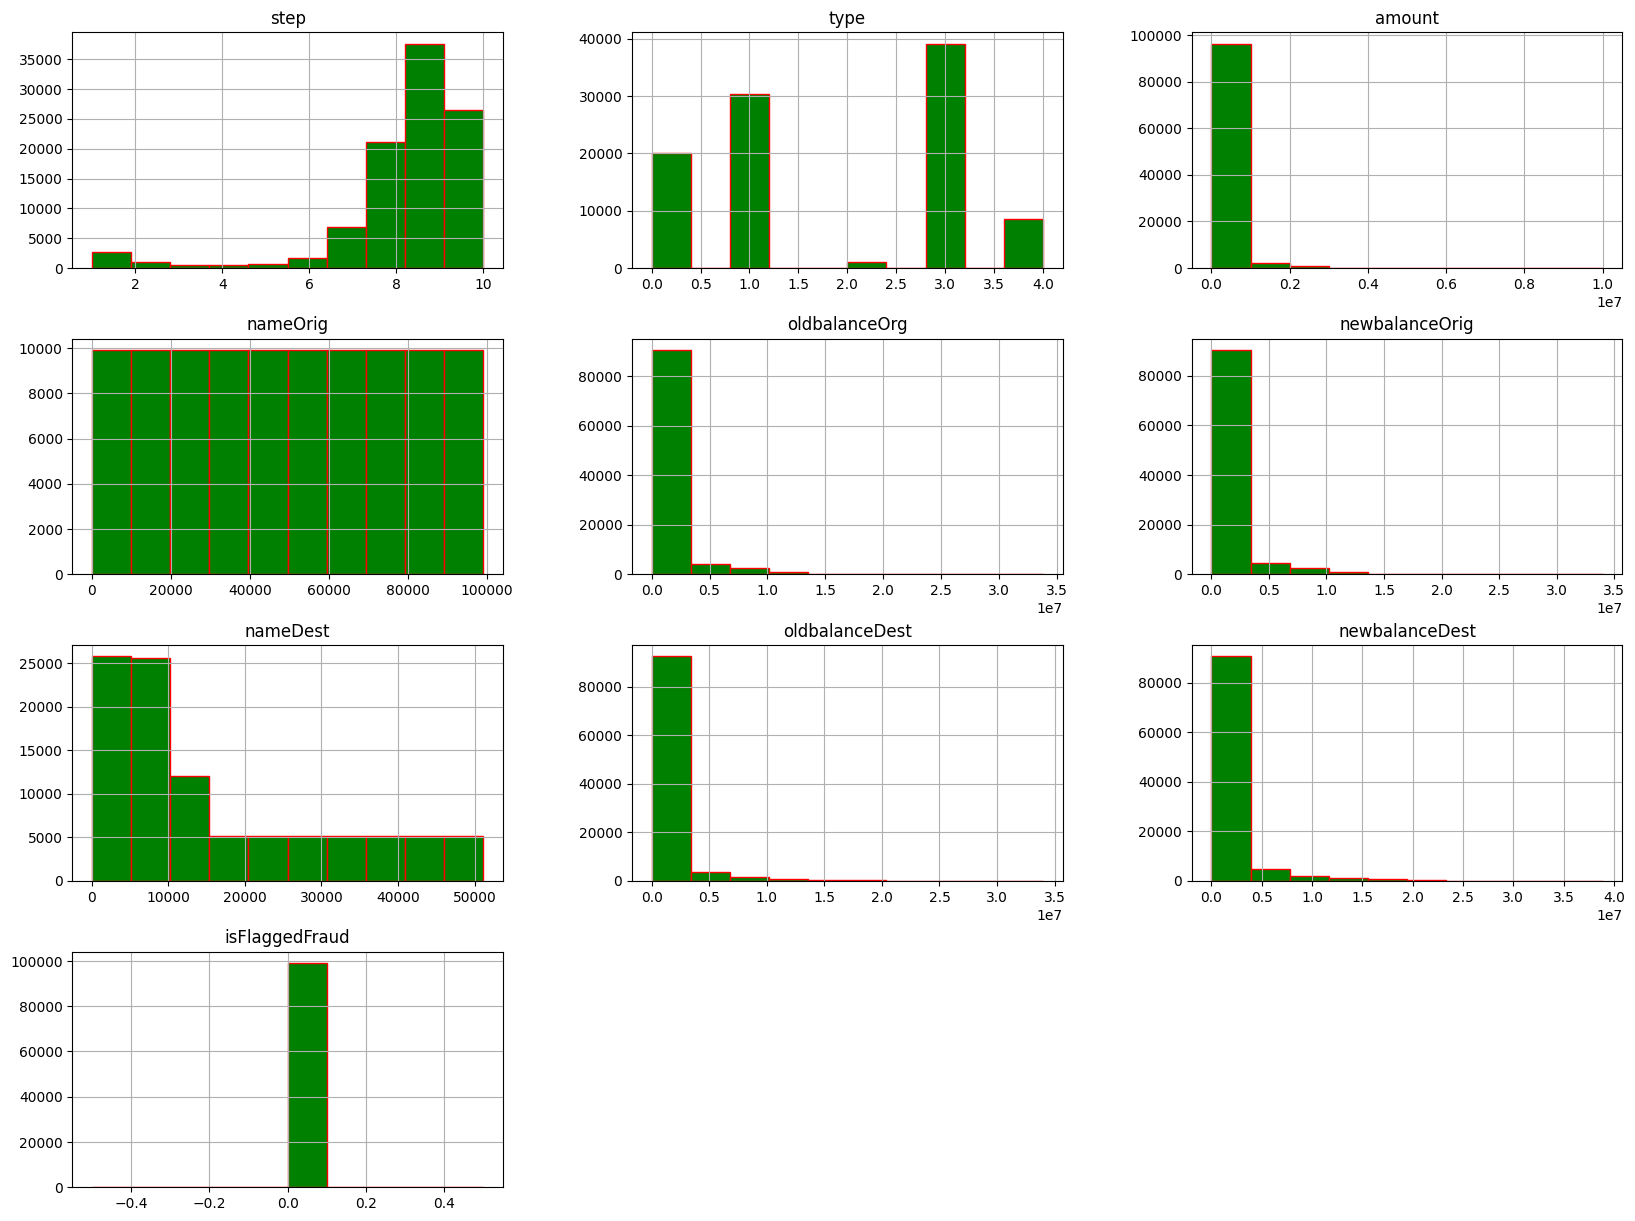

In [28]:
df.hist(figsize=(20,15),color="green",ec="red") #histograms for all

In [29]:
df['type'].value_counts()

type
3    39204
1    30395
0    20104
4     8507
2      985
Name: count, dtype: int64

In [30]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [31]:
y=df.iloc[:,-2]

In [32]:
y

0        No Fraud
1        No Fraud
2           Fraud
3           Fraud
4        No Fraud
           ...   
99190    No Fraud
99191    No Fraud
99192    No Fraud
99193    No Fraud
99194    No Fraud
Name: isFraud, Length: 99195, dtype: object

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(xtrain, ytrain)


C:\Users\aparna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [36]:
# Use the trained model to make predictions on the test data
y_pred = logreg.predict(xtest)


In [37]:
# Calculate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9987398558395081


In [36]:
#model=DecisionTreeClassifier()

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [40]:
dt_pred=dt.predict(xtest)


In [41]:
dt_accuracy=accuracy_score(ytest,dt_pred)

In [42]:
print("Accuracy of Decision tree=",dt_accuracy)

Accuracy of Decision tree= 0.9986894500730884


In [43]:
logreg.predict([[3,98,5567.00,296.36]])

C:\Users\aparna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array(['No Fraud'], dtype=object)

In [44]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.0,160296.36
1,3,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,3,11668.14,41554.0,29885.86
...,...,...,...,...
99190,3,18320.16,16196.0,0.00
99191,3,13079.07,2153.0,0.00
99192,1,354739.54,0.0,0.00
99193,0,227018.07,17699.0,244717.07


In [45]:
import pickle

In [46]:
filename= 'fraud_detection_model.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [47]:
model=pickle.load(open(filename,"rb"))

In [48]:
model.predict([[3,98,5567.00,296.36]])

C:\Users\aparna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No Fraud'], dtype=object)